## insurance claims charges prediction

# step:-1 importing libraries and dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-03-24 04:05:19--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  54.32K  --.-KB/s    in 0.02s   

2024-03-24 04:05:19 (3.38 MB/s) - ‘insurance.csv.1’ saved [55628/55628]



In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#read the dataset
dataset=pd.read_csv("/content/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# step 2:-EDA- exploratory data analysis

In [ ]:
# Descriptive stats
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#null check
dataset[dataset.isnull().any(axis=1)]


,age,sex,bmi,children,smoker,region,charges


In [ ]:
#null check
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


VISUALIZATION

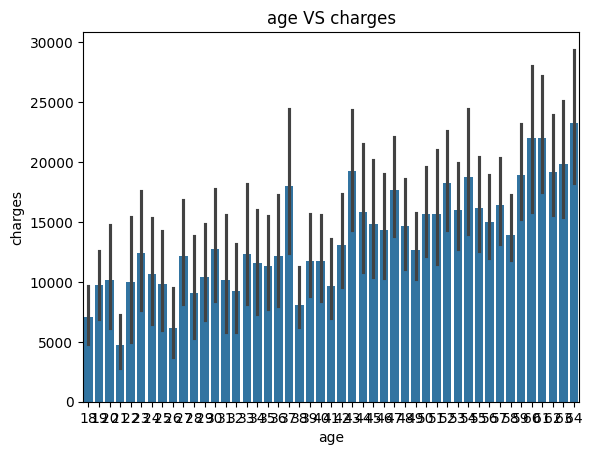

In [ ]:
# Age vs Charges
sns.barplot(x='age',y='charges',data=dataset)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age VS charges')
plt.show()

conclusion:-charges changes linearly with age.the more the age the more will be insurance charge

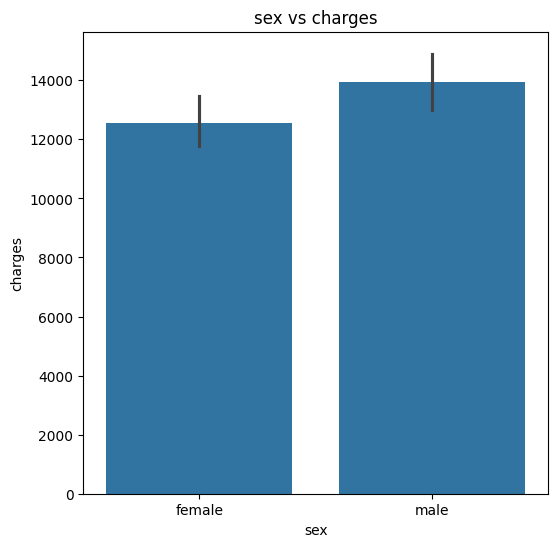

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data =dataset)
plt.title('sex vs charges')
plt.show()

conclusion:-males insurance charges more than females.

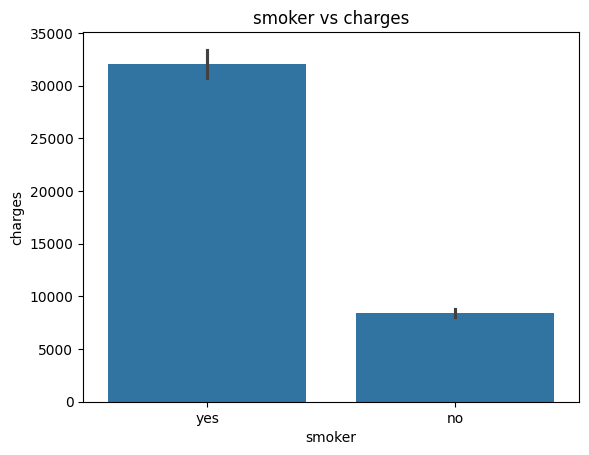

In [ ]:
# smoker vs charges
sns.barplot(x='smoker',y='charges',data=dataset)
plt.title('smoker vs charges')
plt.show()

conclusion:-smoker have more insurance charges than non smokers

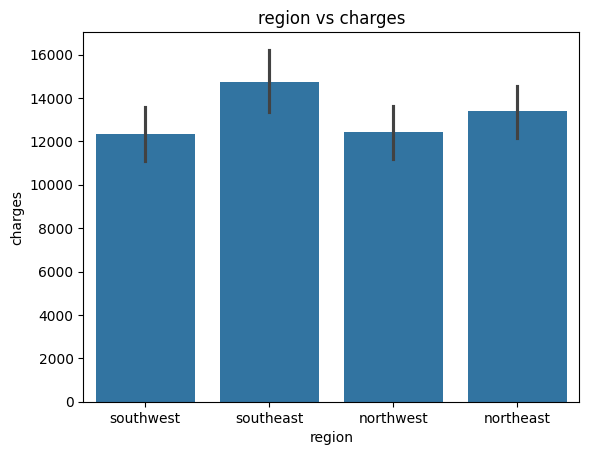

In [ ]:
# region vs charges
sns.barplot(x='region',y='charges',data=dataset)
plt.title('region vs charges')
plt.show( )

conclusion:-region actually does not play any role in determining the insurance charges


<ipython-input-51-192b6a2407ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

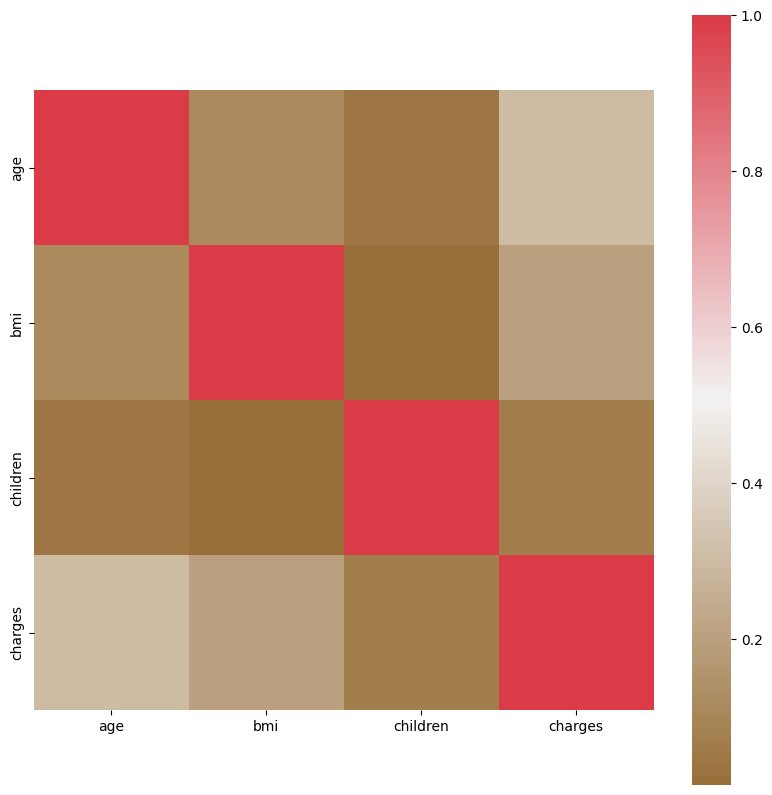

In [ ]:
# plotting the correlation plot for the dataset
f, ax = plt.subplots(figsize = (10, 10))

corr = dataset.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype =bool),
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

# step 3:- datapreprocessing /clean the data

In [ ]:
# removing unnecassary columns from the dataset
dataset.drop('region',axis=1,inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [ ]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset['sex']=label_encoder.fit_transform(dataset['sex'])
dataset['smoker']=label_encoder.fit_transform(dataset['smoker'])

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
y=dataset['charges']
x=dataset.drop(['charges'],axis=1)

In [ ]:
print(x.head())

   age  sex     bmi  children  smoker
0   19    0  27.900         0       1
1   18    1  33.770         1       0
2   28    1  33.000         3       0
3   33    1  22.705         0       0
4   32    1  28.880         0       0


In [ ]:
print(y[:10])

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64


Splitting the dataset into the Training set and Test set



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.head())

      age  sex     bmi  children  smoker
1163   18    0  28.215         0       0
196    39    0  32.800         0       0
438    52    0  46.750         5       0
183    44    0  26.410         0       0
1298   33    1  27.455         2       0


In [ ]:
print(x_test.head())

      age  sex     bmi  children  smoker
578    52    1  30.200         1       0
610    47    0  29.370         1       0
569    48    1  40.565         2       1
1034   61    1  38.380         0       0
198    51    0  18.050         0       0


In [ ]:
print(y_train.head())

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
Name: charges, dtype: float64


In [ ]:
print(y_test.head())

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64


# STEP-4 : Fit the Model & Predict , check the Accuracy

# Linear Regression

In [ ]:
#creating the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# feeding the training data to the model
lr.fit(x_train,y_train)
# predicting the test set results
y_pred=lr.predict(x_test)

In [ ]:
#calculating the mean squared error, root mean squared error, r2 score
from sklearn.metrics import  mean_squared_error, r2_score
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 33571665.685027145
Root Mean Squared Error: 5794.106116134493
R-squared Score: 0.7894790349867009


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 173570923.7700134
Root Mean Squared Error (RMSE): 13174.631826734794
R-squared Score (R2): -0.08842732776913875


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 50223973.27991159
Root Mean Squared Error (RMSE): 7086.887418317832
R-squared Score (R2): 0.6850558616635829


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 22894953.600251973
Root Mean Squared Error (RMSE): 4784.867145517414
R-squared Score (R2): 0.856430486021151
